In [1]:
import torch
from torch_geometric.data import Data
import numpy as np
import tensorflow as tf
import torch
import torch.nn as nn
from torch_geometric.datasets import QM9
import numpy as np
from torch.utils.data import random_split
# import jax
import matplotlib.pyplot as plt
import os

# Define a simple function to convert atom types to atomic numbers
def atom_to_atomic_number(atom):
    mapping = {'H': 1, 'O': 0}
    return mapping.get(atom, 0)


In [2]:
def parse_dataset(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    dataset = []
    i = 0
    while i < len(lines):
        if lines[i].startswith('Energy'):
            # Extract energy
            energy = float(lines[i].split()[-1])
            i += 1  # Move to the next line

            atom_types = []
            positions = []
            while i < len(lines) and not lines[i].startswith('Energy'):
                parts = lines[i].split()
                if len(parts) == 4:  # Ensure the line is for an atom
                    atom_types.append(atom_to_atomic_number(parts[0]))
                    positions.append([float(part) for part in parts[1:]])
                i += 1

            # Convert to PyTorch tensors
            atom_types_tensor = torch.tensor(atom_types, dtype=torch.long)
            positions_tensor = torch.tensor(positions, dtype=torch.float)
            energy_tensor = torch.tensor([energy], dtype=torch.float)

            # Create a Data object
            data = Data(x=atom_types_tensor, pos=positions_tensor, y=energy_tensor)
            dataset.append(data)
        else:
            i += 1  # Skip lines that don't start with 'Energy'

    return dataset

# Load your dataset
dataset = parse_dataset('water-DZ-F12-STATIC-g32n10-3M_PES-DZERO.xyz')


In [3]:
import numpy as np
import tensorflow as tf
import torch
import torch.nn as nn
from torch_geometric.datasets import QM9
import numpy as np
from torch.utils.data import random_split
# import jax
import matplotlib.pyplot as plt
import os

# Function to read and process data from the input format
def read_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    features = []
    labels = []

    i = 0
    while i < len(lines):
        num_atoms = int(lines[i])
        energy = float(lines[i + 1].split()[-1])
        label = np.array([energy])

        atom_data = [line.split() for line in lines[i + 2:i + 2 + num_atoms]]
        coordinates = np.array([[float(coord) for coord in atom[1:]] for atom in atom_data])

        features.append(coordinates.flatten())
        labels.append(label)

        i += 2 + num_atoms

    return np.array(features), np.array(labels)


# Read data from the provided file
file_path = 'water-DZ-F12-STATIC-g32n10-3M_PES-DZERO.xyz'
features, labels = read_data(file_path)
print(features[3], labels[3])
print(len(features), len(labels))

[ 0.02860095  0.          0.43550962 -0.95333518  0.         -0.71874285
  0.49941735  0.         -0.36650326] [-76.24559204]
36003 36003


c:\Python\Python3.9.2\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


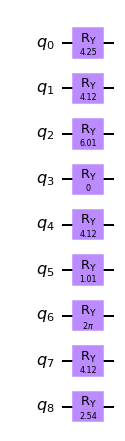

In [1]:
from qiskit import QuantumCircuit
import numpy as np

# Your original data points
data_points = np.array([0.02860095, 0., 0.43550962, -0.95333518, 0., -0.71874285, 0.49941735, 0., -0.36650326])

# Normalize data to [0, 2pi]
min_val = data_points.min()
max_val = data_points.max()
normalized_angles = 2 * np.pi * (data_points - min_val) / (max_val - min_val)

# Initialize a quantum circuit with 9 qubits
qc = QuantumCircuit(len(data_points))

# Apply Ry rotations to each qubit based on the normalized data points
for i, angle in enumerate(normalized_angles):
    qc.ry(angle, i)

# Visualize the circuit
qc.draw(output='mpl')


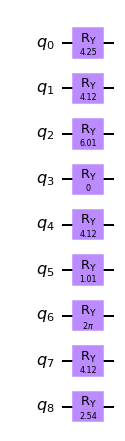

In [3]:
data_points = np.array([0.02860095, 0., 0.43550962, -0.95333518, 0., -0.71874285, 0.49941735, 0., -0.36650326])

# Normalize data to [0, 2pi]
min_val = data_points.min()
max_val = data_points.max()
normalized_angles = 2 * np.pi * (data_points - min_val) / (max_val - min_val)

# Initialize a quantum circuit with 9 qubits
qc = QuantumCircuit(len(data_points))

# Apply Ry rotations to each qubit based on the normalized data points
for i, angle in enumerate(normalized_angles):
    qc.ry(angle, i)

# Visualize the circuit
qc.draw(output='mpl')

c:\Python\Python3.9.2\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


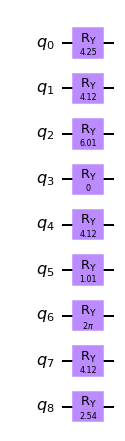

In [5]:
from qiskit.circuit import Parameter
data_points = np.array([0.02860095, 0., 0.43550962, -0.95333518, 0., -0.71874285, 0.49941735, 0., -0.36650326])

# Normalize data to [0, 2pi]
min_val = data_points.min()
max_val = data_points.max()
normalized_angles = 2 * np.pi * (data_points - min_val) / (max_val - min_val)

# Initialize a quantum circuit with 9 qubits
qc = QuantumCircuit(len(data_points))

# Apply Ry rotations to each qubit based on the normalized data points
for i, angle in enumerate(normalized_angles):
    qc.ry(angle, i)

# Visualize the circuit
qc.draw(output='mpl')
param_x = Parameter("x")
feature_map = QuantumCircuit(len(data_points), name="fm")
for i, angle in enumerate(normalized_angles):
    feature_map.ry(angle, i)
    
feature_map.draw(output='mpl')